# Predição dos valores de faturamento

In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

def Salva_DB(Caminho,Filename,Arquivo):
    open_file = open(f'{Caminho}/{Filename}', "wb")
    pickle.dump(Arquivo, open_file)
    open_file.close()

def Abre_DB(Caminho,Filename):
    with open(f'{Caminho}/{Filename}','rb') as f:
        DB = pickle.load(f)
    return DB

In [2]:
import os
out = os.path.basename('C:/Users/guga_/Desafio Geofusion/Dados')


X_train = pd.DataFrame(Abre_DB(f'{out}/Treino','X_train_faturamento.pkl'))
y_train = pd.DataFrame(Abre_DB(f'{out}/Treino','y_train_faturamento.pkl'))
X_Test = pd.DataFrame(Abre_DB(f'{out}/Teste','X_test_faturamento.pkl'))
y_Test = pd.DataFrame(Abre_DB(f'{out}/Teste','y_test_faturamento.pkl'))

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_Test.shape)
print(y_Test.shape)

(136, 18)
(136, 1)
(24, 18)
(24, 1)


# Regressão Linear

In [4]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, np.array(y_train))


LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_train, LR.predict(X_train))
mae = mean_absolute_error(y_train, LR.predict(X_train))
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  8388493375.817291  & mae =  62845.114155561074  & rmse =  91588.71860560826


In [6]:
test_mse = mean_squared_error(y_Test, LR.predict(X_Test))
test_mae = mean_absolute_error(y_Test, LR.predict(X_Test))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  83451573271.4918  & mae =  129238.72252314421  & rmse =  288879.85958091955


In [7]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_Test.iloc[:,0], LR.predict(X_Test) ))  
print('MSE:', metrics.mean_squared_error(y_Test.iloc[:,0], LR.predict(X_Test)))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test.iloc[:,0], LR.predict(X_Test))))
print('VarScore:',metrics.explained_variance_score(y_Test.iloc[:,0],LR.predict(X_Test)))

MAE: 129238.72252314421
MSE: 83451573271.4918
RMSE: 288879.85958091955
VarScore: 0.7875666525438443


In [8]:
teste = pd.DataFrame(y_Test)
teste['previsão_LR'] = LR.predict(X_Test)



# Abordagem com redes neurais

In [9]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(max_iter=10000,solver='lbfgs',random_state=1,hidden_layer_sizes=(17,17))
model1.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(17, 17), max_iter=10000, random_state=1,
              solver='lbfgs')

In [10]:
from sklearn.metrics import accuracy_score
test_mse = mean_squared_error(y_Test.iloc[:,0], model1.predict(X_Test))
test_mae = mean_absolute_error(y_Test.iloc[:,0], model1.predict(X_Test))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  101811089857.875  & mae =  173481.875  & rmse =  319078.50109005306


In [11]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_Test.iloc[:,0], model1.predict(X_Test) ))  
print('MSE:', metrics.mean_squared_error(y_Test.iloc[:,0], model1.predict(X_Test)))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test.iloc[:,0], model1.predict(X_Test))))
print('VarScore:',metrics.explained_variance_score(y_Test.iloc[:,0],model1.predict(X_Test)))

MAE: 173481.875
MSE: 101811089857.875
RMSE: 319078.50109005306
VarScore: 0.7120332334373064


In [12]:
teste = pd.DataFrame(y_Test)
teste['previsão_NN'] = model1.predict(X_Test)



# Keras Regression


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train.shape

(136, 18)

In [15]:
model = Sequential()
model.add(Dense(18,input_shape = (18,),activation='relu'))
model.add(Dense(36,input_shape = (18,),activation='sigmoid'))
model.add(Dense(72,kernel_regularizer='l2'))
model.add(Dense(36,input_shape = (18,),activation='sigmoid'))
model.add(Dense(18,input_shape = (18,),activation='relu'))
model.add(Dense(18,kernel_regularizer='l2'))




model.add(Dense(1,activation='relu'))
model.compile(optimizer='Adam',loss='mse')
callback = EarlyStopping(monitor='loss', patience=3)

In [16]:
from sklearn.model_selection import GridSearchCV
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


In [17]:
history =model.fit(x=X_train,y=y_train,
          validation_data=(X_Test,y_Test),
          epochs=4000,callbacks = callback)
model.summary()

Epoch 1/4000
5/5 [==============================] - 1s 33ms/step - loss: 890315145216.0000 - val_loss: 1427486932992.0000
Epoch 2/4000
5/5 [==============================] - 0s 5ms/step - loss: 890313637888.0000 - val_loss: 1427485884416.0000
Epoch 3/4000
5/5 [==============================] - 0s 4ms/step - loss: 890312785920.0000 - val_loss: 1427484573696.0000
Epoch 4/4000
5/5 [==============================] - 0s 5ms/step - loss: 890311671808.0000 - val_loss: 1427483131904.0000
Epoch 5/4000
5/5 [==============================] - 0s 4ms/step - loss: 890310361088.0000 - val_loss: 1427481427968.0000
Epoch 6/4000
5/5 [==============================] - 0s 4ms/step - loss: 890308722688.0000 - val_loss: 1427479461888.0000
Epoch 7/4000
5/5 [==============================] - 0s 5ms/step - loss: 890307149824.0000 - val_loss: 1427477233664.0000
Epoch 8/4000
5/5 [==============================] - 0s 5ms/step - loss: 890305118208.0000 - val_loss: 1427474743296.0000
Epoch 9/4000
5/5 [=============

In [18]:
len(history.history['loss'])

1365

<AxesSubplot:>

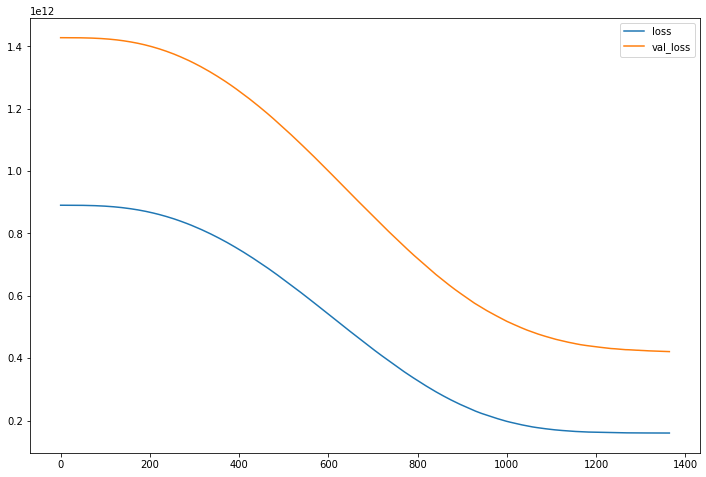

In [19]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 345605.3125
MSE: 372212777965.97784
RMSE: 610092.4339524118
VarScore: 2.220446049250313e-16


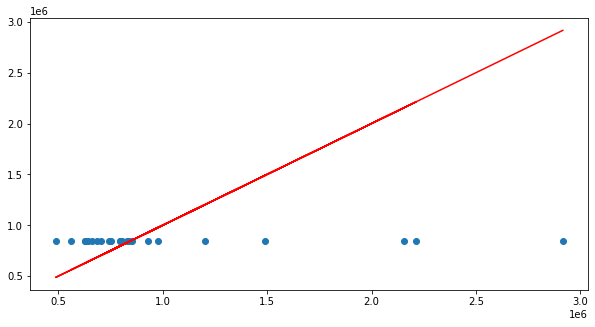

In [20]:
teste = pd.DataFrame(y_Test)
teste['previsão_KeNN'] = model.predict(X_Test)
y_pred = model.predict(X_Test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_Test.iloc[:,0], y_pred ))  
print('MSE:', metrics.mean_squared_error(y_Test.iloc[:,0], y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test.iloc[:,0], y_pred)))
print('VarScore:',metrics.explained_variance_score(y_Test.iloc[:,0],y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_Test.iloc[:,0],y_pred)
# Perfect predictions
plt.plot(y_Test.iloc[:,0],y_Test.iloc[:,0],'r')

In [21]:
teste

,faturamento,previsão_LR,previsão_NN,previsão_KeNN
105,832018.0,8.310170e+05,806674.0,845417.5625
108,808082.0,8.489861e+05,856901.0,845417.5625
141,2157079.0,2.666615e+06,2384494.0,845417.5625
55,641865.0,7.579680e+05,736698.0,845417.5625
94,978197.0,9.372361e+05,1041359.0,845417.5625
29,488021.0,5.709785e+05,720444.0,845417.5625
101,744303.0,8.107426e+05,795430.0,845417.5625
51,796321.0,8.301544e+05,798206.0,845417.5625
100,630075.0,7.003768e+05,711591.0,845417.5625
142,1200769.0,1.120245e+06,1073403.0,845417.5625


# Salvar o modelo

In [22]:
model.save(f'Modelos/KeNN{np.round(metrics.explained_variance_score(y_Test.iloc[:,0],y_pred),3)}')



INFO:tensorflow:Assets written to: Modelos/KeNN0.0\assets


# Aplicar o modelo aos dados de SP

In [23]:
import tensorflow as tf
new_model = tf.keras.models.load_model(f'Modelos/KeNN{np.round(metrics.explained_variance_score(y_Test.iloc[:,0],y_pred),3)}')
new_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 36)                684       
                                                                 
 dense_2 (Dense)             (None, 72)                2664      
                                                                 
 dense_3 (Dense)             (None, 36)                2628      
                                                                 
 dense_4 (Dense)             (None, 18)                666       
                                                                 
 dense_5 (Dense)             (None, 18)                342       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [24]:
Base_SP = Abre_DB(f'{out}/Teste','Base_SP.pkl')

In [25]:
faturamento = pd.DataFrame(new_model.predict(Base_SP))
faturamento

,0
0,845417.5625
1,845417.5625
2,845417.5625
3,845417.5625
4,845417.5625
...,...
291,845417.5625
292,845417.5625
293,845417.5625
294,845417.5625
